In [1]:
# Solo estas 3 librerias son necesarias
#import csv
#import numpy as np (Parece q no son necesarias)
import dnaplotlib as dpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from skimage import io
%matplotlib inline 

In [18]:
# Se crea un diccionario con los colores que se usaran en la imagen, de todas maneras el color puede ponerse despues.
# Cada color es resultado de valores entre 0 y 1 en RGB.

col_map = {} #Diccionario vacio
col_map['red']     = (0.95, 0.30, 0.25)
col_map['green']   = (0.38, 0.82, 0.32)
col_map['blue']    = (0.38, 0.65, 0.87)
col_map['orange']  = (1.00, 0.75, 0.17)
col_map['purple']  = (0.55, 0.35, 0.64)
col_map['yellow']  = (0.98, 0.97, 0.35)
col_map['grey']    = (0.70, 0.70, 0.70)
col_map['dark_grey'] = (0.60, 0.60, 0.60)
col_map['light_grey'] = (0.9, 0.9, 0.9)


In [19]:
# Se da Formato a los CDS

# label = Corresponde al nombre del CDS
# label_style = Tipo de letra (italic ,normal or oblique)
# label_y_offset = Desplazamiento desde el centro del CDS('0' es el centro)
# color = Color del CDS se especifica segun el diccionario usado anteriormente. 
# label_color = especifica el color de la label (Usa RGB entre 0 y 1)

opt_CDS1 = {'label':'GenAriel', 'label_style':'italic', 'label_y_offset':-0.2, 'color':col_map['blue']}
opt_CDS2 = {'label':'geneB', 'label_style':'normal', 'label_y_offset':-0.2, 'color':col_map['dark_grey']}
opt_CDS3 = {'label':'geneC', 'label_color': (1,1,1), 'label_style':'oblique', 'label_y_offset':-0.2, 'color':col_map['purple']}
opt_CDS4 = {'label':'geneD', 'label_style':'normal', 'label_y_offset':-0.2, 'color':col_map['red']}
opt_CDS5 = {'label':'geneE', 'label_style':'italic', 'label_y_offset':-0.2, 'color':col_map['light_grey']}
opt_UD1 = {'label':'Z', 'label_color': (1,0,0), 'label_style':'italic', 'label_y_offset':-0.2, 'color':col_map['orange']}

In [20]:
%%html
Partes Disponibles
<img src = 'partesdnaplotlib.png', width = 1000 , height = 1000 >


In [21]:
# Diseño de cada una de las partes que contienen los 3 constructos 

# type = Define la parte correspondiente

# Standard part types
#    'Promoter','CDS', 'Terminator', 'RBS', 'Scar', 'Spacer', 'EmptySpace', 'Ribozyme', Ribonuclease',
#    'Protease', 'DNACleavageSite', 'RNACleavageSite', 'ProteinCleavageSite', 'DNALocation', 'RNALocation',
#    'ProteinLocation', 'DNAStability', 'RNAStability', 'ProteinStability', 'StemTop', 'Operator', 'Origin',
#    'Insulator', '5Overhang', '3Overhang', 'RestrictionSite', 'BluntRestrictionSite', 'PrimerBindingSite',
#    '5StickyRestrictionSite', '3StickyRestrictionSite', 'UserDefined', 'Signature']

# name = Nombre de la parte
# start y end = Determina comienzo y final de cada pieza...es importante para determinar el tamano de la pieza y relativizarla respecto a otras
# fwd = Direccionalidad de la pieza, True = Fwd y False = Rev
# opts = Se linkea con el formato anteriormente definido, si no es necesario se pone directamente el color.

P1 = {'type':'Promoter', 'name':'P1', 'start':0,    'end':23,   'fwd':True, 'opts':{'color':col_map['green']}}
RBS1 = {'type':'RBS', 'name':'RBS1', 'start':72,   'end':106,  'fwd':True, 'opts':{'color':col_map['blue']}}
RBS2 = {'type':'RBS', 'name':'RBS2', 'start':1353, 'end':1392, 'fwd':True, 'opts':{'color':col_map['blue']}}
CDS1 = {'type':'CDS', 'name':'CDS1', 'start':106,  'end':1249, 'fwd':True, 'opts':opt_CDS1}
CDS2 = {'type':'CDS', 'name':'CDS2', 'start':1392, 'end':2595, 'fwd':True, 'opts':opt_CDS2}
CDS3 = {'type':'CDS', 'name':'CDS3', 'start':800, 'end':1400, 'fwd':True, 'opts':opt_CDS3}
CDS4 = {'type':'CDS', 'name':'CDS4', 'start':1700, 'end':2200, 'fwd':True, 'opts':opt_CDS4}
Feature3_4 = {'type':'UserDefined', 'name':'UD1', 'start':1450, 'end':1650, 'fwd':True, 'opts':opt_UD1}
CDS5 = {'type':'CDS', 'name':'CDS5', 'start':1500, 'end':100, 'fwd':False, 'opts':opt_CDS5}
T1 = {'type':'Terminator', 'name':'T1', 'start':2595, 'end':2643, 'fwd':True, 'opts':{'color':col_map['red']}}


In [22]:
# Se genera el diseño, entendiendo por este una lista de las partes y sus propiedades

design_frame1 = [P1, RBS1, CDS1, RBS2, CDS2, T1]
design_frame2 = [CDS3, Feature3_4, CDS4]
design_frame3 = [CDS5]

# Se genera una lista de todos los diseños, esto sirve para determinar el orden en la imagen final

designs = [design_frame1, design_frame2, design_frame3] 


In [23]:
# Generar funcion para generar los dibujos de los contructos en 3 ejes separados

def plot_trace_3_axes (designs, output_prefix): #Se usa como input los diseños y el nombre que llevara el archivo final
    design_frame1 = designs[0]
    design_frame2 = designs[1]
    design_frame3 = designs[2]

# Crea la figura y todos los ejes a dibujar    
    
    fig = plt.figure(figsize=(3.2,1.2)) #Ancho y Alto de la Imagen

# Especifica una cuadricula para que las imagenes se distribuyan.

    gs = gridspec.GridSpec(3, 1, height_ratios=[0.5,0.5,0.75]) #filas, columnas
    #GridSpec crea celdas de igual tamaño, no obstante se pueden ajustar la proporcion usando valores relativos.


# Se define la posicion dentro de la cuadricula (filas). La posicion 2 es la de mas abajo y la 0 la de mas arriba
# Ademas, se define que todas compartiran el eje x el primer frame (mismos limites, escala y ejes)   
    
    ax_dna_frame1 = plt.subplot(gs[2])
    ax_dna_frame2 = plt.subplot(gs[1], sharex=ax_dna_frame1)
    ax_dna_frame3 = plt.subplot(gs[0], sharex=ax_dna_frame1)


# Crear la figura del ADN

    dr = dpl.DNARenderer(scale=5, linewidth=0.9)#Cambiar escala y ancho de linea
#Se genera el primer constructo. End y Start quedan definidos segun el largo de las piezas.
#Ademas se agrega el backbone.
    start1, end1 = dr.renderDNA(ax_dna_frame1, design_frame1, dr.trace_part_renderers(), plot_backbone=True)
    dna_len = end1-start1 #Longitud del ADN   

#Limites del eje x y el eje Y (Dejar espacios a los lados de cada eje)
    ax_dna_frame1.set_xlim([start1-20, end1+20])
    ax_dna_frame1.set_ylim([-3.5,7])

#Se grafica un background manual, mas alla de los limites de la imagen 
    ax_dna_frame1.plot([start1-20,end1+20], [0,0], color=(0,0,0), linewidth=1.0, zorder=1)
    ax_dna_frame1.axis('off') #Agrega Ejes enmarcando solo el cuadrante seleccionado


#Generar los otros constructos, no se coloca background ya se definio arriba.
    start2, end2 = dr.renderDNA(ax_dna_frame2, design_frame2, dr.trace_part_renderers(), plot_backbone=False)
    ax_dna_frame2.set_ylim([-3.5,3.5])
    ax_dna_frame2.axis('off')

    start3, end3 = dr.renderDNA(ax_dna_frame3, design_frame3, dr.trace_part_renderers(), plot_backbone=False)
    ax_dna_frame3.set_ylim([-3.5,3.5])
    ax_dna_frame3.axis('off')
    
# Cambiar como se ven las imagenes entre ellas
# left, derecho, bottom y top = Espacio para el lado correspondiente de los subplots de la figura
# wspace, hspace = El monto de ancho y altura reservado para espaciar los subplots (Expresado como una fraccion)
    plt.subplots_adjust(hspace=.001, left=.01, right=.99, top=0.99, bottom=0.01)


# Grabar la Imagen como pdf y png (utilizando el nombre especificado en la funcion)
    fig.savefig(output_prefix+'.pdf', transparent=True)
    fig.savefig(output_prefix+'.png', dpi=300)

# Cerrar para eliminar todo el cache asociado a este proceso
    
    plt.close('all')   
    
    
    

In [24]:
#Plotear la imagen final
plot_trace_3_axes(designs, 'offset_features_3axes')

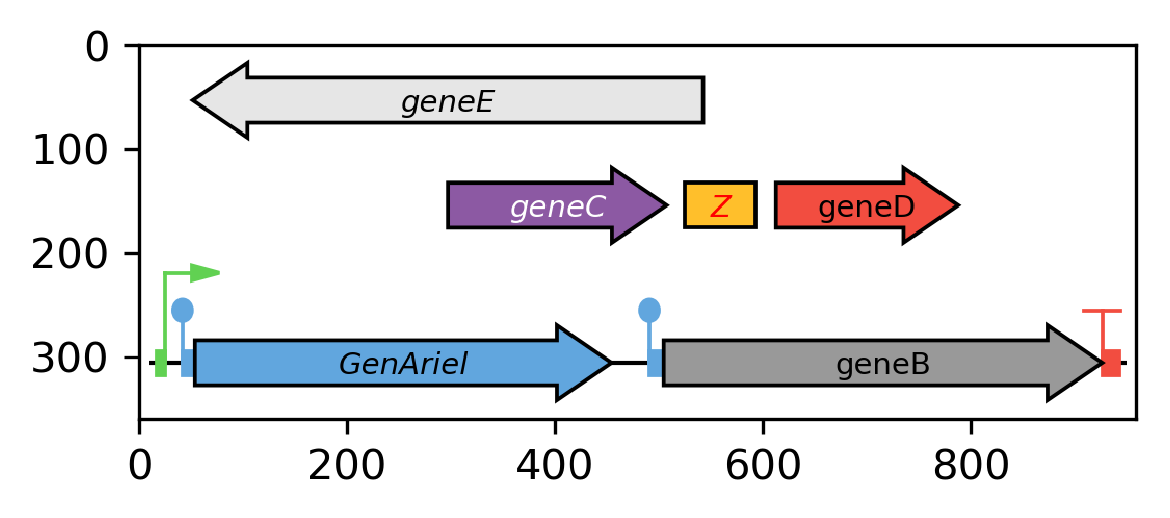

In [3]:
#Solo para ver cambios realizados en el codigo mas rapido

img = io.imread('offset_features_3axes.png')
plt.figure(figsize=(4, 4), dpi=300)
io.imshow(img, cmap = 'gray')